## Importing libraries

In [146]:
import numpy as np
import cv2
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from keras.applications import vgg16

## Organize, process and visualize the data

In [19]:
#Organizing data into train, validation and test sets

os.chdir('Data/Artists_2')
if os.path.isdir('train/Vincent_van_Gogh') is False:
    os.makedirs('train/Vincent_van_Gogh')
    os.makedirs('train/Edgar_Degas')
    os.makedirs('valid/Vincent_van_Gogh')
    os.makedirs('valid/Edgar_Degas')
    os.makedirs('test/Vincent_van_Gogh')
    os.makedirs('test/Edgar_Degas')

    for i in random.sample(glob.glob('Edgar_Degas*'), 500):
        shutil.move(i, 'train/Edgar_Degas')      
    for i in random.sample(glob.glob('Vincent_van_Gogh*'), 500):
        shutil.move(i, 'train/Vincent_van_Gogh')
    for i in random.sample(glob.glob('Edgar_Degas*'), 100):
        shutil.move(i, 'valid/Edgar_Degas')        
    for i in random.sample(glob.glob('Vincent_van_Gogh*'), 100):
        shutil.move(i, 'valid/Vincent_van_Gogh')
    for i in random.sample(glob.glob('Edgar_Degas*'), 50):
        shutil.move(i, 'test/Edgar_Degas')      
    for i in random.sample(glob.glob('Vincent_van_Gogh*'), 50):
        shutil.move(i, 'test/Vincent_van_Gogh')

os.chdir('../../')

In [20]:
train_path = 'Data/Artists_2/train'
valid_path = 'Data/Artists_2/valid'
test_path = 'Data/Artists_2/test'

In [21]:
#Preprocessing images

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['Edgar_Degas', 'Vincent_van_Gogh'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['Edgar_Degas', 'Vincent_van_Gogh'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['Edgar_Degas', 'Vincent_van_Gogh'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [22]:
imgs, labels = next(train_batches)

In [43]:
#Visualize the paintings

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

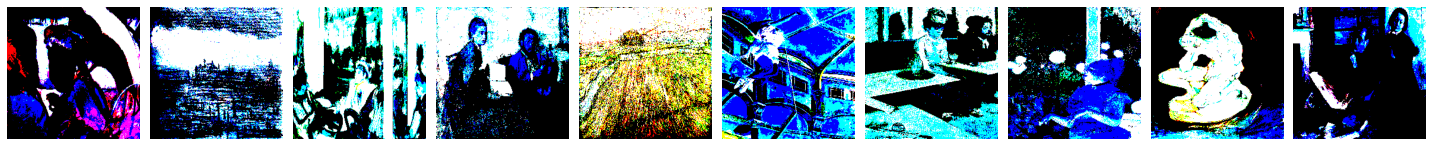

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [24]:
plotImages(imgs)
print(labels)

# Build and train the CNN (Convolutional Neural Network)

In [25]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [27]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2)

Epoch 1/10
100/100 - 54s - loss: 25.5798 - acc: 0.6560 - val_loss: 6.3163 - val_acc: 0.7900
Epoch 2/10
100/100 - 50s - loss: 4.2096 - acc: 0.8070 - val_loss: 4.8941 - val_acc: 0.8400
Epoch 3/10
100/100 - 50s - loss: 1.2593 - acc: 0.8950 - val_loss: 4.7494 - val_acc: 0.7900
Epoch 4/10
100/100 - 49s - loss: 0.4844 - acc: 0.9430 - val_loss: 1.5787 - val_acc: 0.8500
Epoch 5/10
100/100 - 50s - loss: 0.1130 - acc: 0.9770 - val_loss: 1.4330 - val_acc: 0.8700
Epoch 6/10
100/100 - 49s - loss: 0.1086 - acc: 0.9780 - val_loss: 1.4361 - val_acc: 0.8350
Epoch 7/10
100/100 - 50s - loss: 0.0691 - acc: 0.9850 - val_loss: 1.8229 - val_acc: 0.8050
Epoch 8/10
100/100 - 50s - loss: 0.0389 - acc: 0.9890 - val_loss: 1.6306 - val_acc: 0.8550
Epoch 9/10
100/100 - 49s - loss: 0.0020 - acc: 0.9990 - val_loss: 1.6425 - val_acc: 0.8550
Epoch 10/10
100/100 - 49s - loss: 6.4819e-04 - acc: 1.0000 - val_loss: 1.4866 - val_acc: 0.8550


## Prediction

In [29]:
test_imgs, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

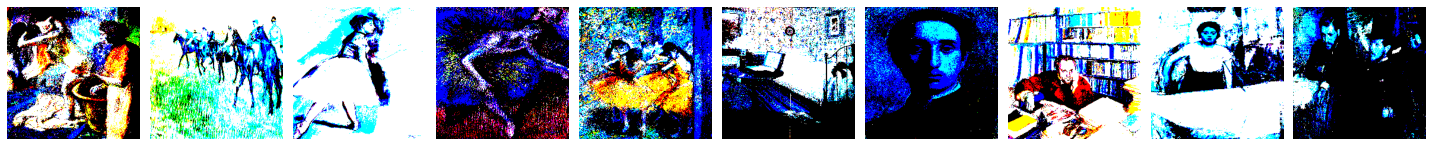

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [30]:
plotImages(test_imgs)
print(test_labels)

In [31]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [32]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [33]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [34]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis=-1))

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
test_batches.class_indices

{'Edgar_Degas': 0, 'Vincent_van_Gogh': 1}

Confusion matrix, without normalization
[[41  9]
 [ 9 41]]


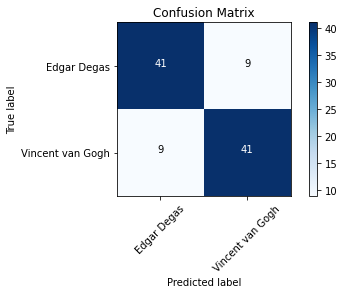

In [37]:
cm_plot_labels = ['Edgar Degas','Vincent van Gogh']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

We can see that the model correctly predicted that a painting was from Edgar Degas 41 times and it incorrectly predicted that a painting was from Edgar Degas 9 times when it was from Vincent van Gogh. It correctly predicted that a painting was from Vincent van Gogh 41 times and incorrectly predicted 9 times.

### Save model

In [147]:
import os.path
if os.path.isfile('Model/cnn_model.h5') is False:
    model.save('Model/cnn_model.h5')

# Build and train the VGG16 model

In [50]:
#Import the VGG16 model from Keras
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [55]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [56]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [57]:
#Iterate over each of the layers in our new Sequential model and set them to be non-trainable
for layer in model.layers:
    layer.trainable = False

In [58]:
#We add our new output layer, consisting in only 2 nodes that correspond to Edgar Degas and Vincent van Gogh
model.add(Dense(units=2, activation='softmax'))

In [60]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
#Train the model
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2)

Epoch 1/5
100/100 - 592s - loss: 0.5381 - acc: 0.7520 - val_loss: 0.3302 - val_acc: 0.8550
Epoch 2/5
100/100 - 634s - loss: 0.3045 - acc: 0.8550 - val_loss: 0.2664 - val_acc: 0.8700
Epoch 3/5
100/100 - 624s - loss: 0.2322 - acc: 0.8970 - val_loss: 0.2357 - val_acc: 0.8800
Epoch 4/5
100/100 - 597s - loss: 0.1909 - acc: 0.9190 - val_loss: 0.2185 - val_acc: 0.8950
Epoch 5/5
100/100 - 614s - loss: 0.1618 - acc: 0.9320 - val_loss: 0.2121 - val_acc: 0.8900


## Prediction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

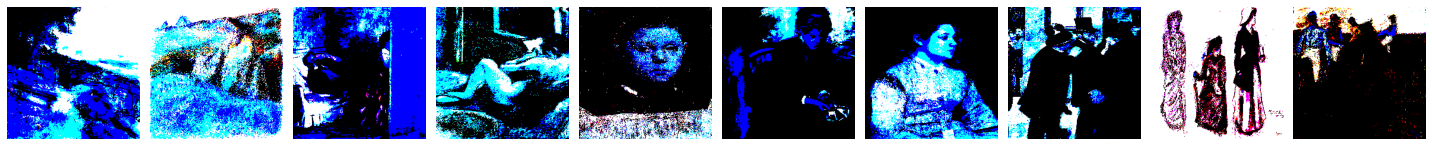

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [31]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [33]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=2)

10/10 - 49s


Confusion matrix, without normalization
[[39 11]
 [11 39]]


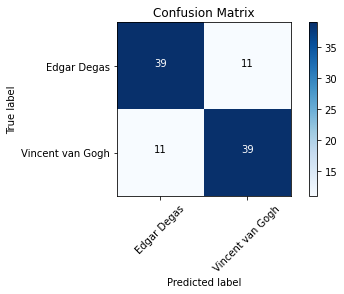

In [34]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['Edgar Degas','Vincent van Gogh']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

The VGG-16 model has correctly predicted that a painting was from Edgar Degas 39 times and it incorrectly predicted that a painting was from Edgar Degas 11 times when it was from Vincent van Gogh. It correctly predicted that a painting was from Vincent van Gogh 39 times and incorrectly predicted 11 times.

### Save model

In [35]:
if os.path.isfile('Model/vgg16_model.h5') is False:
    model.save('Model/vgg16_model.h5')